In [1]:
import pandas as pd
import os

In [35]:
file_list = []
for i in os.listdir():
    if 'MOS_SR_' in i:
        file_list.append(i)
df1 = pd.read_pickle(file_list[0])
df2 = pd.read_pickle(file_list[1])
df3 = pd.read_pickle(file_list[2])
df4 = pd.read_pickle(file_list[3])
df5 = pd.read_pickle(file_list[4])

rez = pd.concat([df1,
                 df2,
                 df3,
                 df4,
                 df5
                ],axis = 1)
print(rez.shape)
del df1, df2, df3,df4,df5

(39885, 3469)


In [18]:
# для балансировки классов
from sklearn.model_selection import train_test_split
division = rez.deal_type_rent.value_counts().values.tolist()
parth = division[1]/division[0]
# только для конкретного класса
rent = rez[rez.deal_type_rent==1]
sale = rez[rez.deal_type_rent==0]
del rez
rez = rent
rez_rent, _ = train_test_split(rent, test_size=1 - parth)
rez_rent.shape
del rent, _
rez = pd.concat([rez_rent, sale], ignore_index=True)
del rez_rent, sale

In [36]:
rez.deal_type_rent.value_counts()

1    25854
0    14031
Name: deal_type_rent, dtype: int64

In [37]:
import pandas as pd
import numpy as np
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import matplotlib.pyplot as plt
np.random.seed(444)
import matplotlib.pyplot as plt
import xgboost
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [41]:
#X = rez.drop(['rules_Ставка'], axis=1)
X = rez.drop(['rules_Ставка','rules_Цена'], axis=1)
#y = rez['rules_Цена'].values
y = rez['rules_Ставка'].values
#del rez

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state = 0)
#X_train,X_test,y1_train,y1_test = train_test_split(X, y1 ,test_size=0.2)
#del X, y

In [ ]:
xgb = xgboost.XGBRegressor(n_estimators=500, 
                           learning_rate=0.2, 
                           max_depth=7,
                           n_jobs=-1,
                          )

In [ ]:
xgb.fit(X_train,y_train)

predictions = xgb.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(explained_variance_score(predictions,y_test))
print(rmse, y_test.mean())

In [ ]:
for i in range(50):
    print(predictions[i], y_test[i])

In [ ]:
xgb.save_model('moscow_9083_stavka_sss_price_wob_REZ_balance_class.mdl')

# load model

In [28]:
import os
file_list = os.listdir()
models = []
for file in file_list:
    if 'REZ_balance_class.mdl' in file:
        models.append(file)
models.sort()
models

['moscow_7987_stavka_bez_price_REZ_balance_class.mdl',
 'moscow_8317_stavka_bez_price_wob_REZ_balance_class.mdl',
 'moscow_8668_stavka_sss_price_REZ_balance_class.mdl',
 'moscow_9083_stavka_sss_price_wob_REZ_balance_class.mdl']

In [42]:
i = 1
models[i]

'moscow_8317_stavka_bez_price_wob_REZ_balance_class.mdl'

In [43]:
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
xgb = xgboost.XGBRegressor()
xgb.load_model(models[i])
predictions = xgb.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(explained_variance_score(predictions,y_test))
print(rmse, y_test.mean())

0.8317055960967704
86407.88251844037 114401.01943086373


for i in range(100):
    print(str(y_test[i])+"\t<==>\t"+str(predictions[i]))

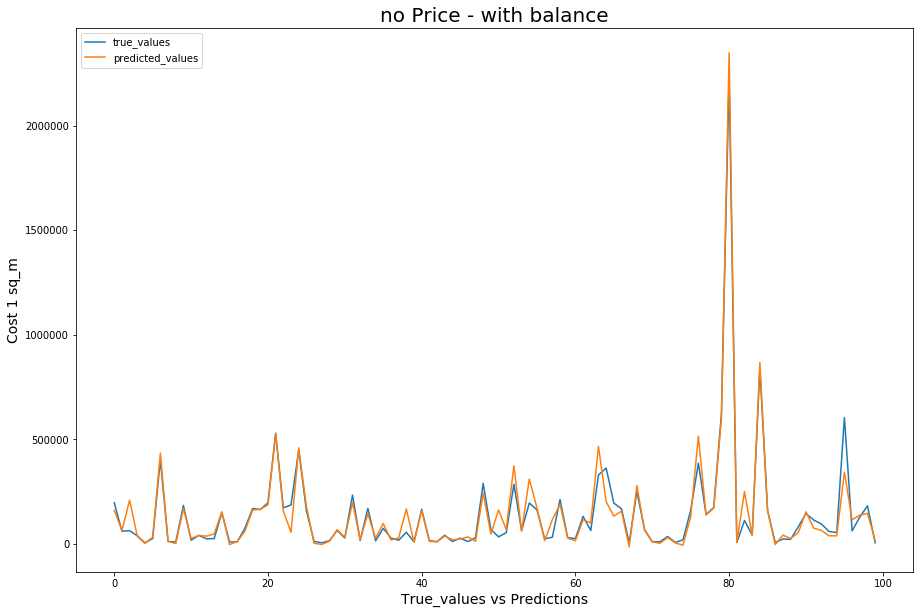

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)
n=0
m=100 
plt.plot(y_test[n:m], label = 'true_values')
plt.plot(predictions[n:m], label = 'predicted_values')
plt.legend(loc = 'upper left')
plt.xlabel('True_values vs Predictions', size = 14)
plt.ylabel('Cost 1 sq_m', size = 14)
plt.title('no Price - with balance', size = 20)
plt.show()